In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# 1. Carregar os dados

In [18]:
df = pd.read_csv('../data/Dados_Limpos.csv', sep=';')

# 2. Separar variáveis preditoras e variável alvo

In [19]:
X = df[['Temperatura', 'Umidade', 'Pressao', 'Velocidade_Vento']]
y = df['Producao_Agua']

# 3. Dividir em treino e teste

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treinar o modelo

In [21]:
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 5. Avaliar o modelo

In [22]:
y_pred = modelo.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}')
print(f'R²: {r2_score(y_test, y_pred):.2f}')

RMSE: 0.15
R²: 0.97


c:\Program Files\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 6. Visualizar importância das variáveis 

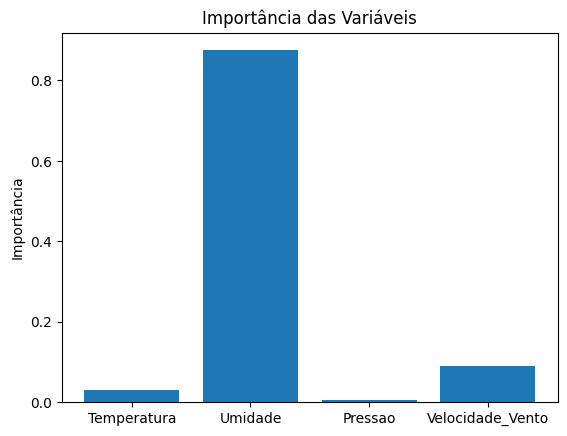

In [23]:
importances = modelo.feature_importances_
plt.bar(X.columns, importances)
plt.title("Importância das Variáveis")
plt.ylabel("Importância")
plt.show()

# 7. Salvar o modelo treinado

In [24]:
joblib.dump(modelo, '../modelo_treinado.pkl')
print("Modelo salvo como 'modelo_treinado.pkl'")

Modelo salvo como 'modelo_treinado.pkl'
